In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data=pd.read_csv("/content/drive/MyDrive/tweets.csv")

In [5]:
# Drop rows where the 'cyberbullying_type' column has the value 'other_cyberbullying'
data = data[data['cyberbullying_type'] != 'other_cyberbullying']


In [6]:
data.tail(10)

,tweet_text,cyberbullying_type,cyberbullying_type.1
47682,But... he’s right. Atlanta is full of so calle...,ethnicity,NaN
47683,Black is a color . African American is a Cultu...,ethnicity,NaN
47684,"After black soldiers fought in WWI, many of th...",ethnicity,NaN
47685,@KeithBishop64 Very true. It was a nice show t...,ethnicity,NaN
47686,@YourFavWhiteGuy shut the fuck upAbout your du...,ethnicity,NaN
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,NaN
47688,Turner did not withhold his disappointment. Tu...,ethnicity,NaN
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,NaN
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,NaN
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,NaN


## Removing unneccesory spaces and replacing @ with a and h


In [7]:
import pandas as pd
import re

# Function to clean URLs and unnecessary spaces, and replace @ and #
def clean_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Replace @ with 'a' and # with 'h'
    text = text.replace('@', 'a').replace('#', 'h')

    # Remove unnecessary spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Assuming 'data' is your loaded DataFrame
# For example: data = pd.read_csv('your_file.csv')

# Apply the cleaning function to the 'tweet_text' column
data['cleaned_tweet'] = data['tweet_text'].apply(clean_tweet)

# View the cleaned data
print(data[['tweet_text', 'cleaned_tweet']].head())
data.head(10)

                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                       cleaned_tweet  
0  In other words hkatandandre, your food was cra...  
1  Why is haussietv so white? hMKR htheblock hImA...  
2  aXochitlSuckkks a classy whore? Or more red ve...  
3  aJason_Gio meh. :P thanks for the heads up, bu...  
4  aRudhoeEnglish This is an ISIS account pretend...  


,tweet_text,cyberbullying_type,cyberbullying_type.1,cleaned_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,not_cyberbullying,"In other words hkatandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,gender,Why is haussietv so white? hMKR htheblock hImA...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,religion,aXochitlSuckkks a classy whore? Or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,other_cyberbullying,"aJason_Gio meh. :P thanks for the heads up, bu..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,age,aRudhoeEnglish This is an ISIS account pretend...
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,ethnicity,"aRaja5aab aQuickieleaks Yes, the test of god i..."
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,NaN,Itu sekolah ya bukan tempat bully! Ga jauh kay...
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,NaN,Karma. I hope it bites Kat on the butt. She is...
8,@stockputout everything but mostly my priest,not_cyberbullying,NaN,astockputout everything but mostly my priest
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,NaN,Rebecca Black Drops Out of School Due to Bully...


### Label Encoding


In [8]:
from sklearn.preprocessing import LabelEncoder

# Define the available categories
categories = ['ethnicity', 'age', 'religion', 'gender', 'not_cyberbullying']

# Initialize the LabelEncoder and fit it to the categories
label_encoder = LabelEncoder()
label_encoder.fit(categories)

# Apply label encoding to the 'cyberbullying type' column
data['cyberbullying_type_encoded'] = label_encoder.transform(data['cyberbullying_type'])

# View the original and encoded labels
print(data[['cyberbullying_type', 'cyberbullying_type_encoded']].head())

# Optionally, if you want to see the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


  cyberbullying_type  cyberbullying_type_encoded
0  not_cyberbullying                           3
1  not_cyberbullying                           3
2  not_cyberbullying                           3
3  not_cyberbullying                           3
4  not_cyberbullying                           3
{'age': 0, 'ethnicity': 1, 'gender': 2, 'not_cyberbullying': 3, 'religion': 4}


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

### SVM classifier


In [10]:
X = data['cleaned_tweet']
y = data['cyberbullying_type_encoded']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # You can change max_features to optimize performance
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Training the Support Vector Classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)  # Linear kernel works well for text
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9338
                   precision    recall  f1-score   support

              age       0.96      0.97      0.97      1599
        ethnicity       0.99      0.99      0.99      1616
           gender       0.95      0.86      0.90      1541
not_cyberbullying       0.82      0.90      0.86      1634
         religion       0.96      0.94      0.95      1584

         accuracy                           0.93      7974
        macro avg       0.94      0.93      0.93      7974
     weighted avg       0.94      0.93      0.93      7974



## RoBERTa for other_cyberbullying


In [25]:
from transformers import pipeline

# Initialize zero-shot classification pipeline
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def predict_manual_input(svm_model, tfidf, label_encoder):
    # Take a manual tweet input from the user
    tweet_input = input("Enter tweet to be checked: ")

    # Clean the tweet input (same preprocessing applied as before)
    def clean_tweet(tweet):
        return tweet.strip().replace("@", ",")  # Example cleaning: remove spaces and replace "@"

    tweet_input_cleaned = clean_tweet(tweet_input)

    # Transform the input tweet using the trained TF-IDF vectorizer
    tweet_input_tfidf = tfidf.transform([tweet_input_cleaned])

    # Predict the class label using the SVM model
    predicted_label = svm_model.predict(tweet_input_tfidf)

    # Convert the predicted numeric label back to the original category
    predicted_category = label_encoder.inverse_transform(predicted_label)[0]

    # If the SVM model predicts "not_cyberbullying", check with the zero-shot classifier
    if predicted_category == "not_cyberbullying":
        # Use zero-shot classifier to check for bullying
        labels = ["bullying", "not bullying"]
        result = zero_shot_classifier(tweet_input, candidate_labels=labels)

        # Get the label with the highest score
        highest_label = result['labels'][0]

        if highest_label == "bullying":
            predicted_category = "other_cyberbullying"
        else:
            predicted_category = "not_cyberbullying"

    # Output the final prediction
    print(f"Predicted Cyberbullying Type: {predicted_category}")

# Example usage of the manual input function
# Make sure `svm_model`, `tfidf`, and `label_encoder` are already trained and initialized
predict_manual_input(svm_model, tfidf, label_encoder)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Enter tweet to be checked: wassup asshole
Predicted Cyberbullying Type: other_cyberbullying


## Test statics for SVM Classifier


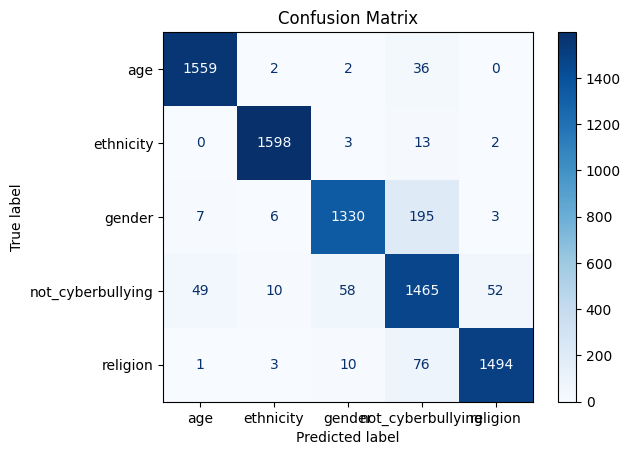

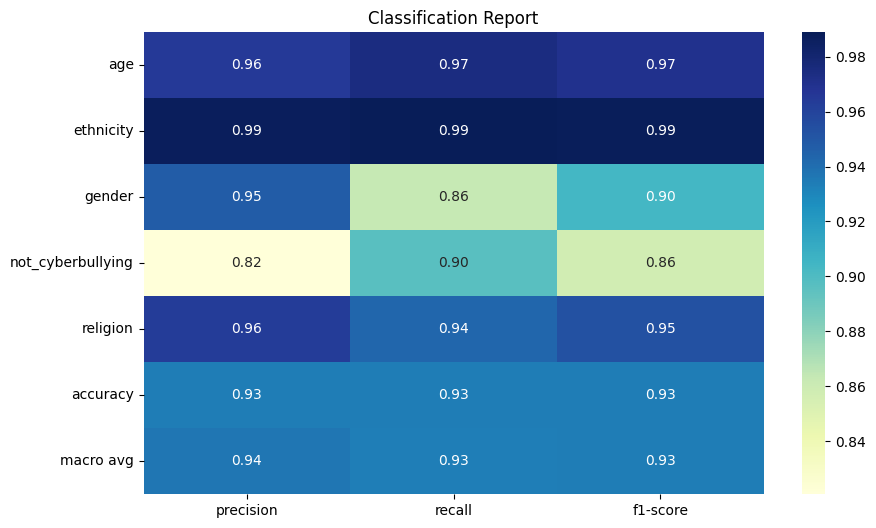

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report as Heatmap
# First, we generate the report in dictionary form
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert the report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.show()


In [24]:
import pickle
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is already loaded and preprocessed

X = data['cleaned_tweet']
y = data['cyberbullying_type_encoded']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # You can change max_features to optimize performance
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Training the Support Vector Classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)  # Linear kernel works well for text
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Saving the model and other components to .pkl files
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf, tfidf_file)

with open('label_encoder.pkl', 'wb') as label_encoder_file:
    pickle.dump(label_encoder, label_encoder_file)

print("Models and vectorizers have been saved as .pkl files.")


Accuracy: 0.9338
                   precision    recall  f1-score   support

              age       0.96      0.97      0.97      1599
        ethnicity       0.99      0.99      0.99      1616
           gender       0.95      0.86      0.90      1541
not_cyberbullying       0.82      0.90      0.86      1634
         religion       0.96      0.94      0.95      1584

         accuracy                           0.93      7974
        macro avg       0.94      0.93      0.93      7974
     weighted avg       0.94      0.93      0.93      7974

Models and vectorizers have been saved as .pkl files.


### checking label count

In [ ]:
# Assuming your DataFrame is called 'data' and the label column is 'cyberbullying_type'
label_counts = data['cyberbullying_type'].value_counts()

# Display the counts for each label
print(label_counts)

# Specifically check the count for "not_cyberbullying"
not_cyberbullying_count = label_counts.get('not_cyberbullying', 0)
print(f"Number of 'not_cyberbullying' instances: {not_cyberbullying_count}")


cyberbullying_type
other_cyberbullying    8016
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
Name: count, dtype: int64
Number of 'not_cyberbullying' instances: 7945
